In [1]:
import pandas as pd
import numpy as np

In [2]:
df_Credit = pd.read_csv("tmdb_5000_credits.csv")
df_movies = pd.read_csv("tmdb_5000_movies.csv")

In [3]:
df_Credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [7]:
#df_Credit.describe().T
df_movies.describe().T

,count,mean,std,min,25%,50%,75%,max
budget,4803.0,2.904504e+07,4.072239e+07,0.0,790000.00000,1.500000e+07,4.000000e+07,3.800000e+08
id,4803.0,5.716548e+04,8.869461e+04,5.0,9014.50000,1.462900e+04,5.861050e+04,4.594880e+05
popularity,4803.0,2.149230e+01,3.181665e+01,0.0,4.66807,1.292159e+01,2.831350e+01,8.755813e+02
revenue,4803.0,8.226064e+07,1.628571e+08,0.0,0.00000,1.917000e+07,9.291719e+07,2.787965e+09
runtime,4801.0,1.068759e+02,2.261193e+01,0.0,94.00000,1.030000e+02,1.180000e+02,3.380000e+02
vote_average,4803.0,6.092172e+00,1.194612e+00,0.0,5.60000,6.200000e+00,6.800000e+00,1.000000e+01
vote_count,4803.0,6.902180e+02,1.234586e+03,0.0,54.00000,2.350000e+02,7.370000e+02,1.375200e+04


In [3]:
df_Credit.columns = ['id','title','cast','crew']
df_movies= df_movies.merge(df_movies,on='id')

In [10]:
df_movies.head(2)

,budget_x,genres_x,homepage_x,id,keywords_x,original_language_x,original_title_x,overview_x,popularity_x,production_companies_x,...,production_countries_y,release_date_y,revenue_y,runtime_y,spoken_languages_y,status_y,tagline_y,title_y,vote_average_y,vote_count_y
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


Using imdb's formula to calculate weighted rating
![image](C:\Users\sidha\OneDrive\Pictures\Screenshots)

In [8]:
# we already have vote average and vote count. Just need to find C
# C is mean vote across whole report
C = df_movies['vote_average_x'].mean()
C

6.092171559442016

In [11]:
# mean vote is 6/10. Now we will calculate the min vote which we will take 90th percentile of C
min_vote  = df_movies['vote_count_x'].quantile(0.9)
min_vote

1838.4000000000015

In [13]:
qualified_movies = df_movies.copy().loc[df_movies['vote_count_x']>=min_vote]
qualified_movies.shape

(481, 39)

In [18]:
def weighted_rating(x,m=min_vote,C=C):
    v = x['vote_count_x']
    r = x['vote_average_x']
    return(v/(v+m)*r+(m/m+v)*C)

In [19]:
qualified_movies['score'] = qualified_movies.apply(weighted_rating,axis=1)

In [24]:
qualified_movies = qualified_movies.sort_values("score",ascending=False)
qualified_movies[['title_y','vote_count_x','vote_average_x','score']].head(20)

,title_y,vote_count_x,vote_average_x,score
96,Inception,13752,8.1,83792.780315
65,The Dark Knight,12002,8.2,73131.446034
0,Avatar,11800,7.2,71899.946043
16,The Avengers,11776,7.4,71753.905208
788,Deadpool,10995,7.4,66995.858409
95,Interstellar,10867,8.1,66216.648484
287,Django Unchained,10099,7.8,61537.531524
94,Guardians of the Galaxy,9742,7.9,59362.673371
426,The Hunger Games,9455,6.9,57613.351047
127,Mad Max: Fury Road,9427,7.2,57443.018495


In [23]:
qualified_movies.head()

,budget_x,genres_x,homepage_x,id,keywords_x,original_language_x,original_title_x,overview_x,popularity_x,production_companies_x,...,release_date_y,revenue_y,runtime_y,spoken_languages_y,status_y,tagline_y,title_y,vote_average_y,vote_count_y,score
96,160000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",http://inceptionmovie.warnerbros.com/,27205,"[{""id"": 1014, ""name"": ""loss of lover""}, {""id"":...",en,Inception,"Cobb, a skilled thief who commits corporate es...",167.583710,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2010-07-14,825532764,148.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Your mind is the scene of the crime.,Inception,8.1,13752,83792.780315
65,185000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",http://thedarkknight.warnerbros.com/dvdsite/,155,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",...,2008-07-16,1004558444,152.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Why So Serious?,The Dark Knight,8.2,12002,73131.446034
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,71899.946043
16,220000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://marvel.com/avengers_movie/,24428,"[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,2012-04-25,1519557910,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some assembly required.,The Avengers,7.4,11776,71753.905208
788,58000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.foxmovies.com/movies/deadpool,293660,"[{""id"": 2095, ""name"": ""anti hero""}, {""id"": 307...",en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,2016-02-09,783112979,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Witness the beginning of a happy ending,Deadpool,7.4,10995,66995.858409


Text(0.5, 1.0, 'Popular Movies')

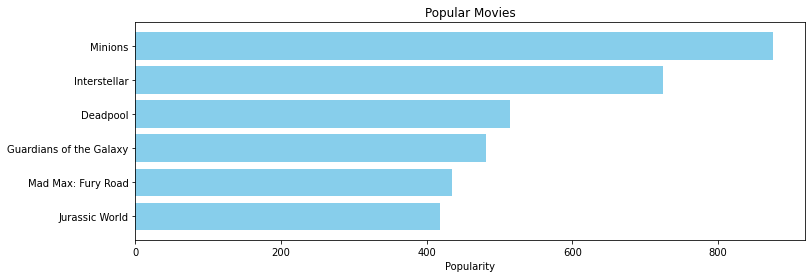

In [29]:
pop= df_movies.sort_values('popularity_x', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title_y'].head(6),pop['popularity_x'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

In [31]:
df_movies['overview_x'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview_x, dtype: object